# Video: Overfitting Made Easy

This video shows how easy it is to make a model that fits its training data perfectly, but does not generalize well to other data.

## Overfitting Made Easy

Overfitting is easy if your model type
* has enough freedom to fit training data exactly, but
* does not lean towards "nice smooth solutions".


Script:
* We say a model overfits if it performs well on the training data, but substantially worse on other data.
* This tends to happen the most when the model is able to fit every point exactly, but is not able to do so smoothly.
* Quantifying smoothly is usually difficult, but we can see the poor performance on other data easily.
* Before I show you models overfitting, beware that these are anti-patterns that I am showing you.
* I am showing them to highlight their pathological behavior, so these are patterns to avoid, and you won't see them often elsewhere for that reason.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

## Sample Data Around $y=0$


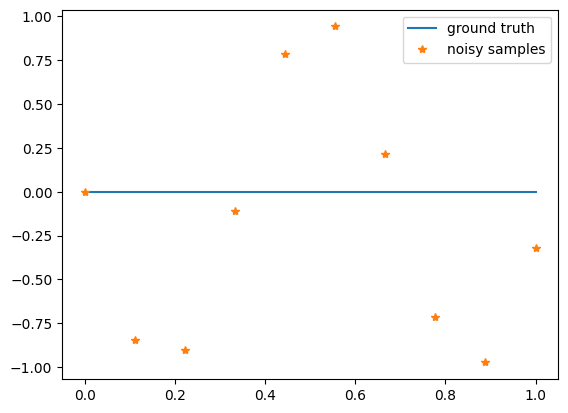

In [ ]:
xs_train = np.linspace(0, 1, 10).reshape(-1, 1)

# some random looking samples centered on zero
ys_train = [ 0.        , -0.84726506, -0.90008412, -0.10893089,  0.78436241,
        0.94219096,  0.21656536, -0.71212478, -0.97308446, -0.3216224 ]

plt.plot([0, 1], [0, 0], label="ground truth")
plt.plot(xs_train, ys_train, label="noisy samples", linestyle="none", marker="*")

plt.legend()

None

## Overfitting with Polynomials


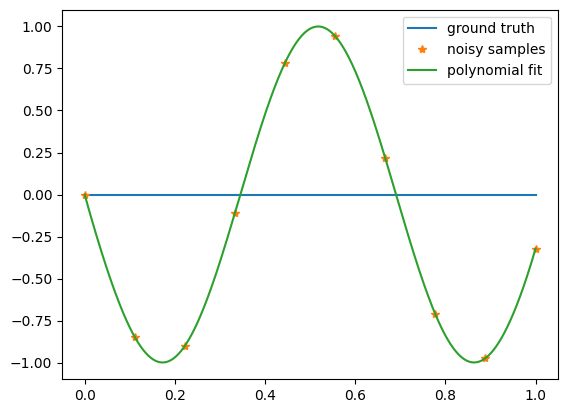

In [ ]:
preprocessing = sklearn.preprocessing.PolynomialFeatures(degree=len(xs_train)-1, include_bias=False)
preprocessing.fit(xs_train)

model = sklearn.linear_model.LinearRegression()
model.fit(preprocessing.transform(xs_train), ys_train)

xs_test = np.linspace(0, 1, 1000).reshape(-1, 1)

plt.plot([0, 1], [0, 0], label="ground truth")
plt.plot(xs_train, ys_train, label="noisy samples", linestyle="none", marker="*")
plt.plot(xs_test, model.predict(preprocessing.transform(xs_test)), label="polynomial fit")

plt.legend()

None

Script:
* We already looked at the bias and variance of polynomials in a previous video, so I'll keep this brief.
* If you want to overfit a polynomial, just make the degree match the number of training data points.

## Sum of Impulses Model


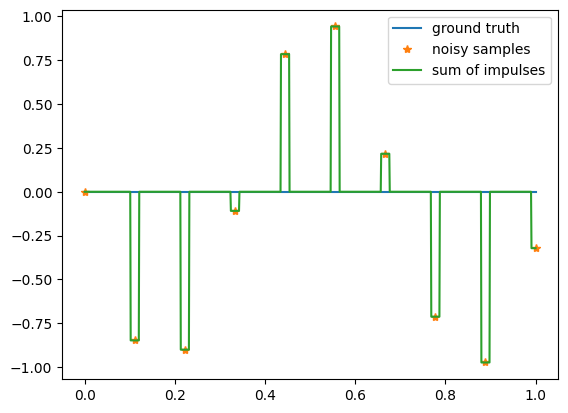

In [ ]:
plt.plot([0, 1], [0, 0], label="ground truth")
plt.plot(xs_train, ys_train, label="noisy samples", linestyle="none", marker="*")
plt.plot(xs_test,
         [sum(y_tr if abs(x_tr - x) < 0.01 else 0.0 for (x_tr, y_tr) in zip(xs_train, ys_train)) for x in xs_test],
         label="sum of impulses")

plt.legend()
None

Script:
* I hope your first reaction to this model is that it is ridiculous.
* Mathematically, an impulse is a spike at a single value, but I've made them wider for visibility.
* You can see how they can precisely fit all these points, yet not give any meaningful predictions in between.
* So they have zero generalization.
* Here's a slightly better version.

## Sum of Gaussians Model


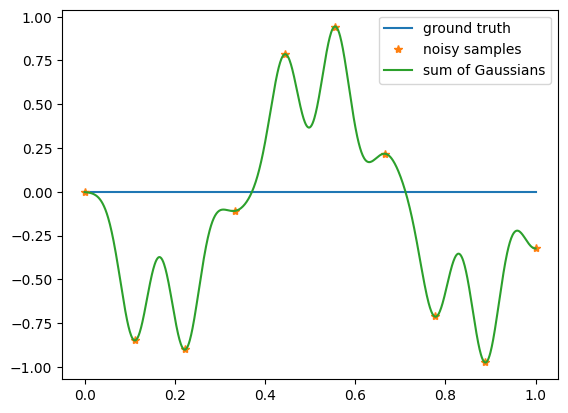

In [ ]:
plt.plot([0, 1], [0, 0], label="ground truth")
plt.plot(xs_train, ys_train, label="noisy samples", linestyle="none", marker="*")
plt.plot(xs_test,
         [sum(y_tr * np.exp(-((x - x_tr)**2)*500) for (x_tr, y_tr) in zip(xs_train, ys_train)) for x in xs_test],
         label="sum of Gaussians")

plt.legend()
None

Script:
* This model was inspired by a real paper about rendering photorealistic 3D scenes using a technique that they called "Gaussian splatting".
* In that paper, they used a number of Gaussian-based shapes that would turn into a 3D scene when rendered together.
* To a degree, they actually wanted to lean into overfitting, but that paper also tried to use fewer wider Gaussians so they could render faster.
* This version here is a dumbed down version, and particularly is lacking the part where they combined neighboring Gaussians.
* That omision leads to the curve being pulled back towards zero between training samples.
* And it kind of looks ridiculous.
* While this looks much better than the previous impulses, this chart seems like it oscillates far more than neccessary.
* The point that I am trying to make is that a model's ability to exactly fit each training point is not necessarily an advantage, if it does not behave reasonably in between data points.


## Linear Interpolation


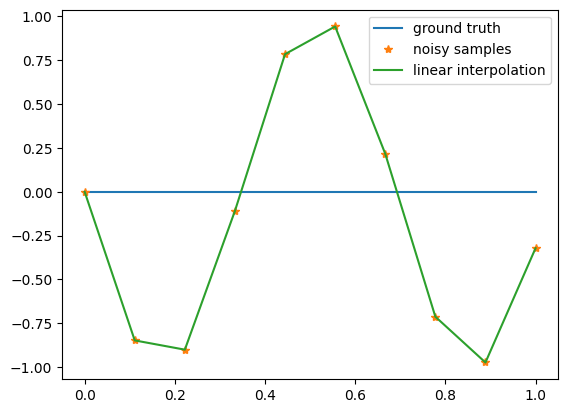

In [ ]:
plt.plot([0, 1], [0, 0], label="ground truth")
plt.plot(xs_train, ys_train, label="noisy samples", linestyle="none", marker="*")

(xs_sorted, ys_sorted) = zip(*sorted(zip(xs_train, ys_train)))
plt.plot(xs_sorted, ys_sorted, label="linear interpolation")

plt.legend()
None

Script:
* Linear interpolation, just drawing a line between adjacent training data points, is much better than the sum of impulses, or an unoptimized sum of Gaussians.
* Sure it could be smoother, but at least it is not oscillating for no reason between points?
* If only we did not know the ground truth, and that this was just fitting noise, we might actually like this model.
* Linear interpolation gets very slow when you have more than one input variable.
* And it does nothing to address noise at all.

## High Frequency Sine Function


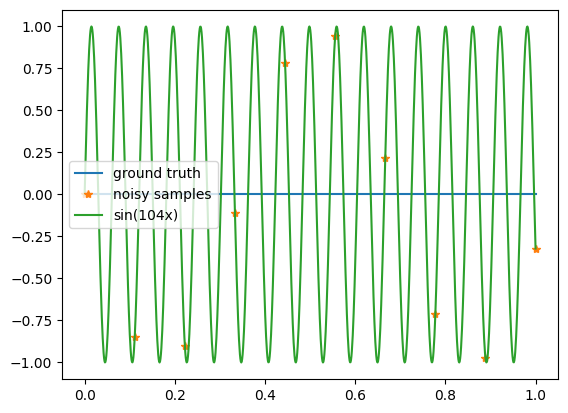

In [ ]:
plt.plot([0, 1], [0, 0], label="ground truth")
plt.plot(xs_train, ys_train, label="noisy samples", linestyle="none", marker="*")
plt.plot(xs_test, np.sin(104 * xs_test), label="sin(104x)")

plt.legend()

None

Script:
* If you looked at the noise and thought it looked like a sine curve, you were right.
* I cheated and made the noise with a sine curve, though you probably thought it had a lower frequency.
* I have seen the claim that you can overfit any dataset with an extremely high frequency sine function and just two parameters.
* I have only seen this actually done with peculiar and exponentially spaced data points.
* For this example, I had to cheat and create the data from the sine function, instead of fitting it.
* Even if you could fit such a function, don't bother.
* Those models are useless.
* At best, they serve as a counter-example to the claim that you need at least one parameter for every data point that you want to fit exactly.


## Neural Networks

Intriguing behavior of neural networks
* Can fit training exactly.
* Sometimes overfit, sometimes do not.
* Current training methods appear to lean towards "nice smooth solutions".


Script:
* On the opposite side, we have neural networks.
* The current best practices recommend over-parameterizing them, so that they have more parameters than needed to fit every training data point exactly.
* And you will see in a later module that they are very good at fitting every training data point.
* While our previous intuition had said this would lead to overfitting, this is not always the case.
* It is certainly possible to overfit a neural network, but this happens less often than we previously expected.
